# PoC ML model for identifying bowel sounds
Goal: develop a proof-of-concept ML model for identifying bowel sounds in audio data and differentiating between 3 main classes:

Single burst (labelled b)
Multiple burst (labelled mb)
Harmonic (labelled h)

• Single burst bowel sounds: These are faint and comprise approximately 85% of all bowel sounds. They occur multiple times per second, typically last 10–40 milliseconds, and have a frequency range of 60 Hz to 2 kHz.[1]
• Distinct burst bowel sounds: Louder and more prominent on the spectrogram, these account for about 5–10% of bowel sounds. Their duration is comparable to single burst sounds, but their frequency can reach up to 3 kHz.[1]
• Multiple burst bowel sounds: These represent clusters of single and distinct burst sounds occurring in quick succession. They account for roughly 5% of all bowel sounds and can last up to 1.5 seconds.[1]
• Continuous random bowel sounds: The rarest type, comprising about 1%, these sounds are irregular and can last for several seconds. They are often associated with audible stomach rumbling.[1]


State of the art:

[1]. https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0311503


[2]. https://arxiv.org/html/2504.08659v1

In [ ]:
# Load the dataset
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/AS_1.txt', delimiter='\t', header=None, names=['Start', 'End', 'Label'])
df.head(100)

,Start,End,Label
0,0.000000,17.019255,n
1,0.988978,1.242612,h
2,1.278083,1.447401,b
3,1.496558,1.644029,b
4,1.731420,1.851581,b
...,...,...,...
95,88.176780,88.362485,mb
96,88.384332,88.509956,b
97,88.559113,88.701122,b
98,88.842846,91.219054,h


In [ ]:
# Clean the dataset
df.dropna(axis=0,inplace=True)

print(df.isnull().sum())  # Check for NaN values in each column

Start    0
End      0
Label    0
dtype: int64


In [ ]:
# Filter to keep only the desired classes
desired_classes = ['b', 'mb', 'h']
df = df[df['Label'].isin(desired_classes)]

# Display the filtered DataFrame
print("\nFiltered DataFrame:")
print(df.head(100))



Filtered DataFrame:
         Start        End Label
1     0.988978   1.242612     h
2     1.278083   1.447401     b
3     1.496558   1.644029     b
4     1.731420   1.851581     b
5     4.189271   4.325818     b
..         ...        ...   ...
103  91.223569  91.328292     b
104  91.393834  92.464365    mb
105  92.502598  93.076097     h
106  93.224945  93.655058    mb
107  93.655058  93.955462    mb

[100 rows x 3 columns]


In [ ]:
# Clean the labels
df['Label'] = df['Label'].str.strip()  # Remove leading/trailing whitespace
df['Label'] = df['Label'].str.lower()  # Convert to lowercase

# Count the cleaned classes
class_counts = df['Label'].value_counts()
print(class_counts)

Label
b     857
mb    773
h      80
Name: count, dtype: int64


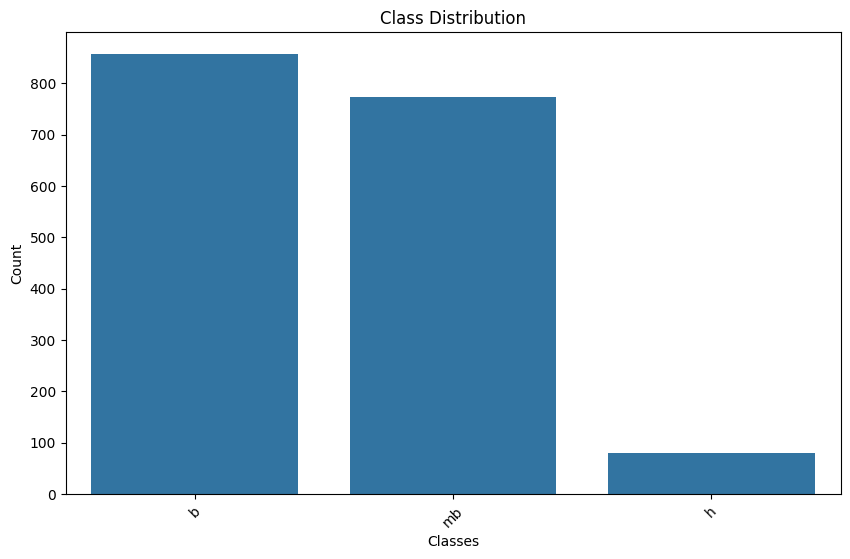

Encoded DataFrame saved to /content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/AS_1.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Visualize the updated class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Label', order=class_counts.index)
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Save the updated DataFrame to a new CSV file
output_file = "/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/AS_1.csv"
df.to_csv(output_file, sep='\t', index=False)  # Use tab as separator if needed
print(f"Encoded DataFrame saved to {output_file}")

# Create audio segments

In [ ]:
import pandas as pd
import os
import soundfile as sf
import librosa

# Load the annotations
annotations_path = '/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/AS_1.csv'
annotations = pd.read_csv(annotations_path, delimiter='\t')

# Load the entire audio file (replace with your actual audio file path)
audio_file_path = '/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/AS_1.wav'  # Change this to your audio file path
y, sr = librosa.load(audio_file_path, sr=None)

# Define output directory for audio segments
output_dir = '/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/audio_segments'
os.makedirs(output_dir, exist_ok=True)

# List to hold the filenames
filenames = []

# Process each row in the annotations
for index, row in annotations.iterrows():
    start = row['Start']
    end = row['End']
    label = row['Label']

    # Extract audio segment
    start_sample = int(start * sr)
    end_sample = int(end * sr)
    segment = y[start_sample:end_sample]

    # Define the output filename
    output_filename = f"{index}_{label}.wav"
    full_output_path = os.path.join(output_dir, output_filename)

    # Save the segment as a WAV file
    sf.write(full_output_path, segment, sr)

    # Append the filename to the list
    filenames.append(output_filename)

# Add the filenames as a new column to the annotations DataFrame
annotations['WAV_Filename'] = filenames

# Save the updated DataFrame to a new file
updated_annotations_path = '/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/AS_1_updated.csv'
annotations.to_csv(updated_annotations_path, sep='\t', index=False)

print("Updated annotations saved to:", updated_annotations_path)

Updated annotations saved to: /content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/AS_1_updated.csv


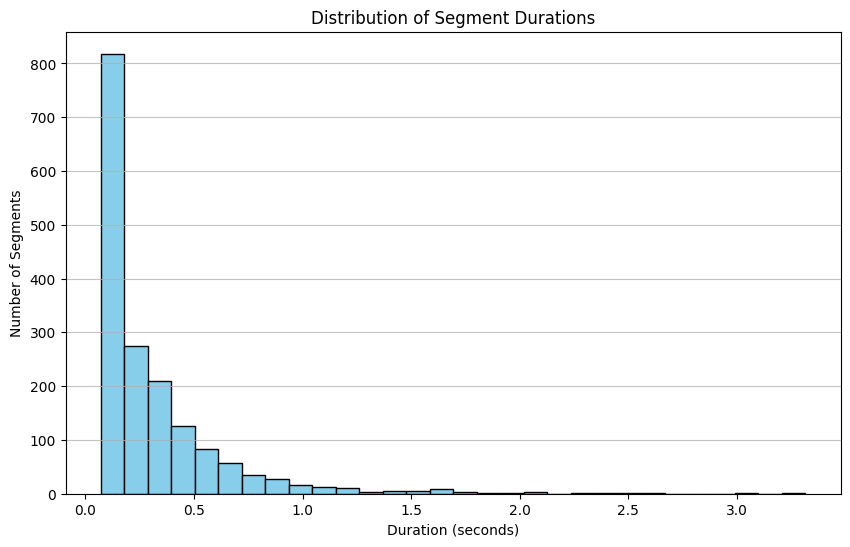

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated annotations
updated_annotations_path = '/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/AS_1_updated.csv'
annotations = pd.read_csv(updated_annotations_path, delimiter='\t')

# Calculate the duration of each segment
annotations['Duration'] = annotations['End'] - annotations['Start']

# Plot the distribution of durations
plt.figure(figsize=(10, 6))
plt.hist(annotations['Duration'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Segment Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of Segments')
plt.grid(axis='y', alpha=0.75)
plt.show()

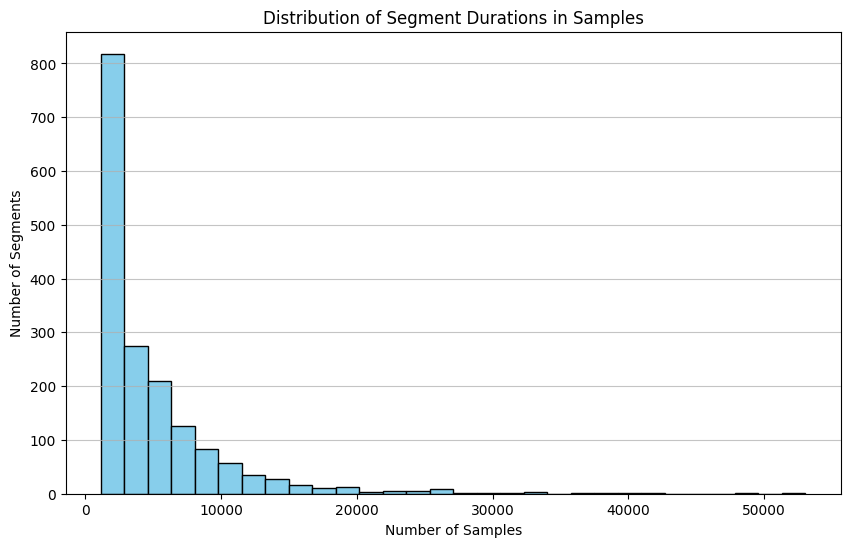

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated annotations
updated_annotations_path = '/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/AS_1_updated.csv'
annotations = pd.read_csv(updated_annotations_path, delimiter='\t')

# Define the sample rate (replace with your actual sample rate)
sample_rate = 16000  # Example sample rate

# Calculate the duration in seconds
annotations['Duration'] = annotations['End'] - annotations['Start']

# Calculate the number of samples
annotations['Samples'] = (annotations['Duration'] * sample_rate).astype(int)

# Plot the distribution of durations in samples
plt.figure(figsize=(10, 6))
plt.hist(annotations['Samples'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Segment Durations in Samples')
plt.xlabel('Number of Samples')
plt.ylabel('Number of Segments')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/AS_1_updated.csv', delimiter='\t')

df['Label'].replace(['b','mb','h'],[0, 1, 2],inplace=True)
print(df.head(1000))

# Assuming df is your DataFrame
#label_encoder = LabelEncoder()
#df['Label'] = label_encoder.fit_transform(df['Label'])
#print(df.head(1000))

# Save the updated DataFrame to a new CSV file
output_file = "/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/AS_1_updated.csv"
df.to_csv(output_file, sep='\t', index=False)  # Use tab as separator if needed
print(f"Encoded DataFrame saved to {output_file}")

          Start         End  Label WAV_Filename
0      0.988978    1.242612      2      0_h.wav
1      1.278083    1.447401      0      1_b.wav
2      1.496558    1.644029      0      2_b.wav
3      1.731420    1.851581      0      3_b.wav
4      4.189271    4.325818      0      4_b.wav
..          ...         ...    ...          ...
995  700.159902  700.405687      1   995_mb.wav
996  700.962800  701.093885      0    996_b.wav
997  701.339670  701.454370      0    997_b.wav
998  701.547222  701.666400      0    998_b.wav
999  701.798469  701.924093      0    999_b.wav

[1000 rows x 4 columns]
Encoded DataFrame saved to /content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/AS_1_updated.csv


/tmp/ipython-input-3801974237.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Label'].replace(['b','mb','h'],[0, 1, 2],inplace=True)
/tmp/ipython-input-3801974237.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Label'].replace(['b','mb','h'],[0, 1, 2],inplace=True)


Label
0    857
1    773
2     80
Name: count, dtype: int64


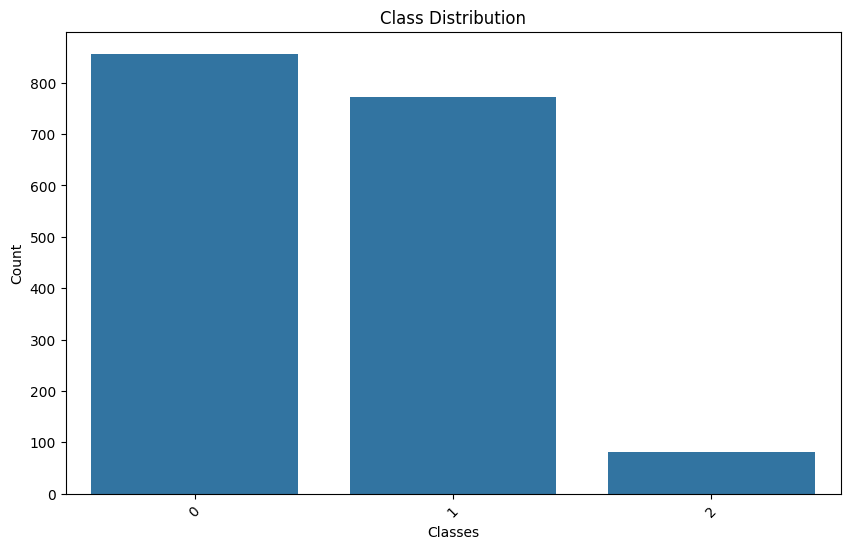

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/AS_1_updated.csv', delimiter='\t')

# Count the cleaned classes
class_counts = df['Label'].value_counts()
print(class_counts)

import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Visualize the updated class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Label', order=class_counts.index)
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



In [ ]:
import torchaudio
import IPython.display as ipd
import pandas as pd
import os

# Load the updated annotations
updated_annotations_path = '/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/AS_1_updated.csv'
annotations = pd.read_csv(updated_annotations_path, delimiter='\t')

# Define a mapping from encoded labels to categorical names
label_mapping = {
    0: 'b',
    1: 'mb',
    2: 'h'
}

# Path to your WAV files directory
audio_dir = '/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/audio_segments'

# Load the specific segment (e.g., segment 150)
segment_index = 968

# Get the corresponding encoded label from annotations
encoded_label = annotations.loc[segment_index, 'Label']
# Map to the categorical label
categorical_label = label_mapping[encoded_label]

# Construct the audio file path
audio_file_path = f"{audio_dir}/{segment_index}_{categorical_label}.wav"  # Use categorical label

# Print the audio file path for verification
print("Loading audio file from:", audio_file_path)

# Check if the file exists
if not os.path.isfile(audio_file_path):
    print("Error: The file does not exist.")
else:
    # Load the audio file
    signal, sr = torchaudio.load(audio_file_path)

    # Create and display the audio player
    audio_player = ipd.Audio(audio_file_path, rate=sr)
    display(audio_player)  # Ensure this line is included to display the audio player

Loading audio file from: /content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/audio_segments/968_b.wav


# Test dataset

In [ ]:
# Load the dataset
import pandas as pd
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/23M74M.txt', delimiter='\t', header=None, names=['Start', 'End', 'Label'])
df2.head(100)

,Start,End,Label
0,1.124516,1.186244,sb
1,1.680065,1.733741,sb
2,1.918924,1.986019,sb
3,2.018225,2.267819,mb
4,2.565722,2.611347,sb
...,...,...,...
95,39.736484,40.775118,mb
96,40.925411,41.022029,sb
97,41.177690,41.258204,sb
98,42.390771,42.479337,sb


In [ ]:
# Clean the dataset
df2.dropna(axis=0,inplace=True)

print(df2.isnull().sum())  # Check for NaN values in each column


df2['Label'].replace(['sb'],['b'],inplace=True)

# Filter to keep only the desired classes
desired_classes = ['b', 'mb', 'h']
df2 = df2[df2['Label'].isin(desired_classes)]

# Display the filtered DataFrame
print("\nFiltered DataFrame:")
print(df2.head(100))

Start    0
End      0
Label    0
dtype: int64

Filtered DataFrame:
         Start        End Label
0     1.124516   1.186244     b
1     1.680065   1.733741     b
2     1.918924   1.986019     b
3     2.018225   2.267819    mb
4     2.565722   2.611347     b
..         ...        ...   ...
96   40.925411  41.022029     b
97   41.177690  41.258204     b
98   42.390771  42.479337     b
99   42.559851  42.632314     b
100  42.688674  43.037570    mb

[100 rows x 3 columns]


/tmp/ipython-input-245554917.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Label'].replace(['sb'],['b'],inplace=True)


In [ ]:
# Clean the labels
df2['Label'] = df2['Label'].str.strip()  # Remove leading/trailing whitespace
df2['Label'] = df2['Label'].str.lower()  # Convert to lowercase

# Count the cleaned classes
class_counts = df2['Label'].value_counts()
print(class_counts)

Label
b     254
mb    230
h      29
Name: count, dtype: int64


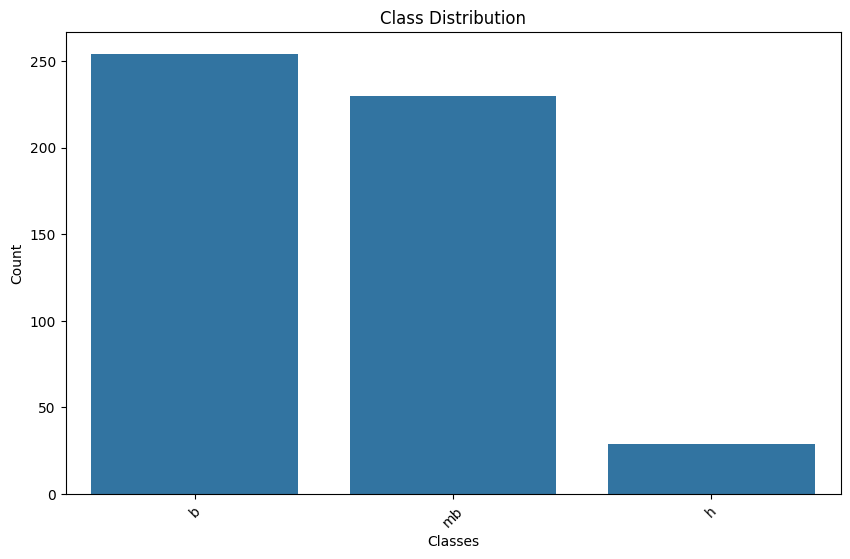

Encoded DataFrame saved to /content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/23M74M.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Visualize the updated class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='Label', order=class_counts.index)
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Save the updated DataFrame to a new CSV file
output_file = "/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/23M74M.csv"
df2.to_csv(output_file, sep='\t', index=False)  # Use tab as separator if needed
print(f"Encoded DataFrame saved to {output_file}")

# Extract audio segment

In [ ]:
import pandas as pd
import os
import soundfile as sf
import librosa

# Load the annotations
annotations_path = '/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/23M74M.csv'
annotations = pd.read_csv(annotations_path, delimiter='\t')

# Load the entire audio file (replace with your actual audio file path)
audio_file_path = '/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/23M74M.wav'  # Change this to your audio file path
y, sr = librosa.load(audio_file_path, sr=None)

# Define output directory for audio segments
output_dir = '/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/audio_segments'
os.makedirs(output_dir, exist_ok=True)

# List to hold the filenames
filenames = []

# Process each row in the annotations
for index, row in annotations.iterrows():
    start = row['Start']
    end = row['End']
    label = row['Label']

    # Extract audio segment
    start_sample = int(start * sr)
    end_sample = int(end * sr)
    segment = y[start_sample:end_sample]

    # Define the output filename
    output_filename = f"short_{index}_{label}.wav"
    full_output_path = os.path.join(output_dir, output_filename)

    # Save the segment as a WAV file
    sf.write(full_output_path, segment, sr)

    # Append the filename to the list
    filenames.append(output_filename)

# Add the filenames as a new column to the annotations DataFrame
annotations['WAV_Filename'] = filenames

# Save the updated DataFrame to a new file
updated_annotations_path = '/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/23M74M_updated.csv'
annotations.to_csv(updated_annotations_path, sep='\t', index=False)

print("Updated annotations saved to:", updated_annotations_path)

Updated annotations saved to: /content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/23M74M_updated.csv


In [ ]:
from sklearn.preprocessing import LabelEncoder

df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/23M74M_updated.csv', delimiter='\t')

df2['Label'].replace(['b','mb','h'],[0, 1, 2],inplace=True)
print(df2.head(1000))

# Assuming df is your DataFrame
#label_encoder = LabelEncoder()
#df['Label'] = label_encoder.fit_transform(df['Label'])
#print(df.head(1000))

# Save the updated DataFrame to a new CSV file
output_file = "/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/23M74M_updated.csv"
df2.to_csv(output_file, sep='\t', index=False)  # Use tab as separator if needed

          Start         End  Label      WAV_Filename
0      1.124516    1.186244      0     short_0_b.wav
1      1.680065    1.733741      0     short_1_b.wav
2      1.918924    1.986019      0     short_2_b.wav
3      2.018225    2.267819      1    short_3_mb.wav
4      2.565722    2.611347      0     short_4_b.wav
..          ...         ...    ...               ...
508  298.316164  298.466457      1  short_508_mb.wav
509  298.683846  298.750941      0   short_509_b.wav
510  299.250130  299.488989      1  short_510_mb.wav
511  299.636598  299.698326      0   short_511_b.wav
512  299.749318  299.819097      0   short_512_b.wav

[513 rows x 4 columns]


/tmp/ipython-input-4158136889.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Label'].replace(['b','mb','h'],[0, 1, 2],inplace=True)
/tmp/ipython-input-4158136889.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Label'].replace(['b','mb','h'],[0, 1, 2],inplace=True)


# Merge both audio dataframe

In [ ]:

df_merged = pd.concat([df, df2], ignore_index=True, sort=False)
df_merged.head(1000)


# Save the updated DataFrame to a new CSV file
output_file = "/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/merged_df.csv"
df_merged.to_csv(output_file, sep='\t', index=False)  # Use tab as separator if needed
print(f"Encoded DataFrame saved to {output_file}")

Encoded DataFrame saved to /content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/merged_df.csv


No need, this is integrated to the Bowel class

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Let's assume you want to use the 'WAV_Filename' as features and 'Label' as labels
X = df_merged['WAV_Filename'].values  # Features
Y = df_merged['Label'].values          # Labels


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Output the results
print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)

X_train: ['23_b.wav' 'short_193_mb.wav' '427_mb.wav' ... '1130_mb.wav'
 '1294_mb.wav' '860_mb.wav']
X_test: ['96_mb.wav' '1401_mb.wav' 'short_284_mb.wav' 'short_277_b.wav'
 '859_b.wav' '707_mb.wav' '1263_mb.wav' '290_mb.wav' 'short_268_mb.wav'
 'short_50_b.wav' '1151_b.wav' 'short_222_mb.wav' '1231_b.wav' '100_b.wav'
 'short_102_mb.wav' '196_b.wav' '771_mb.wav' '530_mb.wav' '792_b.wav'
 '1514_b.wav' '433_b.wav' '111_b.wav' '1110_b.wav' '1505_h.wav'
 '1200_mb.wav' '231_b.wav' '410_mb.wav' '581_b.wav' '599_b.wav'
 'short_398_mb.wav' '538_b.wav' '1708_b.wav' '632_mb.wav' '1532_b.wav'
 '752_b.wav' '1599_mb.wav' '817_b.wav' '1242_mb.wav' '845_mb.wav'
 '1387_b.wav' '168_b.wav' '532_mb.wav' '1131_b.wav' 'short_482_h.wav'
 '275_mb.wav' '508_b.wav' '29_b.wav' 'short_503_b.wav' 'short_17_b.wav'
 '719_h.wav' 'short_70_b.wav' 'short_132_b.wav' '1050_mb.wav' '651_b.wav'
 'short_386_b.wav' '1114_mb.wav' '438_b.wav' '1192_b.wav' '670_mb.wav'
 '965_mb.wav' '571_b.wav' '674_mb.wav' '435_mb.wav' '259_mb

To do :

- Add utility function to analyse the duration of each sgement by label.
- Listen to the audio of each label and try to undurstand what it is like noise.

- Find the best way to create a chunk.
- Take a step back into the phenomene aspect (done: read literature
- Split the dataset with Sklearn. (no need)
- Extract the metrics. (done)
- Use Tensobord to check that there is no overfiting (Train & Eval curves).
- use the second audio as test dataset (done).
- Use this dataset for train, validate and test.
- Fine tuning.

In [ ]:
import pandas as pd
import torch
import torchaudio
import os


# Load your CSV file with the correct delimiter
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/AS_1_updated.csv', delimiter='\t')

# Print the columns to verify the structure
print("Columns in DataFrame:", df.columns)

# Define the actual label column name after verification
label_column_name = 'Label'  # Adjust this if the actual name is different

# Define the directory where audio files are stored
audio_directory = '/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/audio_segments'  # Update this path

# Create a list to hold new rows for the updated DataFrame
new_rows = []

# Function to add Gaussian noise
def add_gaussian_noise(y, noise_level=0.005):
    noise = noise_level * torch.randn(y.size())
    augmented_data = y + noise
    return augmented_data

# Define target count for 'h' to match the majority class (e.g., 857)
target_count_h = 10  # Adjust as needed
current_count_h = len(df[df[label_column_name] == 2])  # Count of label 'h'
samples_to_augment = target_count_h - current_count_h

# Process segments labeled 'h' and augment as needed
for index, row in df[df[label_column_name] == 2].iterrows():  # Assuming 'h' is labeled as 2
    wav_filename = row['WAV_Filename']
    full_path = os.path.join(audio_directory, wav_filename)  # Full path to the audio file

    # Check if the file exists
    if not os.path.exists(full_path):
        print(f"File not found: {full_path}")
        continue  # Skip this iteration if the file doesn't exist

    # Load the audio file
    waveform, sample_rate = torchaudio.load(full_path)

    # Add Gaussian noise for the original segment
    augmented_segment = add_gaussian_noise(waveform)

    # Save the original augmented audio in the audio directory
    new_filename = os.path.join(audio_directory, f"augmented_{wav_filename}")
    torchaudio.save(new_filename, augmented_segment, sample_rate)

    # Add row for the original augmented audio
    new_rows.append({
        'Start': row['Start'],  # Same Start time as original
        'End': row['End'],      # Same End time as original
        'Label': row[label_column_name],
        'WAV_Filename': new_filename
    })

    # Generate additional augmented samples until the target count is reached
    for i in range(samples_to_augment):
        augmented_segment = add_gaussian_noise(waveform)
        new_filename = os.path.join(audio_directory, f"augmented_{index}_h_{i}.wav")  # Save in the audio directory
        torchaudio.save(new_filename, augmented_segment, sample_rate)

        # Add row for each augmented sample with the same Start and End
        new_rows.append({
            'Start': row['Start'],  # Same Start time as original
            'End': row['End'],      # Same End time as original
            'Label': row[label_column_name],
            'WAV_Filename': new_filename
        })

# Create a DataFrame for new rows
new_df = pd.DataFrame(new_rows)

# Concatenate the original DataFrame with the new rows
updated_df = pd.concat([df, new_df], ignore_index=True)

# Save the updated DataFrame to a new CSV file
updated_df.to_csv('AS_1_updated.csv', index=False, sep='\t')  # Adjust the delimiter if necessary

Columns in DataFrame: Index(['Start', 'End', 'Label', 'WAV_Filename'], dtype='object')


# Data augmentation
Due to umbalance between classes, specially the 'h' label, we can add AWGN to the audio to augment the data

In [ ]:
import pandas as pd
import os
import torch
import torchaudio

# Load your CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/df_merged.csv', delimiter='\t')

# Define the directory where audio files are stored
audio_directory = '/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/audio_segments'  # Update this path

# Function to add Gaussian noise
def add_gaussian_noise(y, noise_level=0.001):
    noise = noise_level * torch.randn(y.size())
    augmented_data = y + noise
    return augmented_data

# Number of augmented samples to create for each 'h' sample
num_augmented_samples = 5  # Change this to your desired number

# Create a list to hold new rows for the updated DataFrame
new_rows = []

# Process segments labeled 'h' and augment as needed
for index, row in df[df['Label'] == 2].iterrows():  # Assuming 'h' is labeled as 2
    wav_filename = row['WAV_Filename']
    full_path = os.path.join(audio_directory, wav_filename)  # Full path to the audio file

    # Load the audio file
    waveform, sample_rate = torchaudio.load(full_path)

    # Generate the specified number of augmented samples
    for i in range(num_augmented_samples):
        # Add Gaussian noise for the original segment
        augmented_segment = add_gaussian_noise(waveform)

        # Create a unique filename for the augmented audio
        new_filename = f"{os.path.splitext(wav_filename)[0]}_augmented_{index}_{i}.wav"
        torchaudio.save(os.path.join(audio_directory, new_filename), augmented_segment, sample_rate)

        # Add row for the augmented audio with a unique filename
        new_rows.append({
            'Start': row['Start'],  # Same Start time as original
            'End': row['End'],      # Same End time as original
            'Label': row['Label'],
            'WAV_Filename': new_filename
        })

# Create a DataFrame for new rows
new_df = pd.DataFrame(new_rows)

# Concatenate the original DataFrame with the new rows
updated_df = pd.concat([df, new_df], ignore_index=True)

# Save the updated DataFrame to a new CSV file
updated_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/AS_1_updated.csv', index=False, sep='\t')  # Adjust the delimiter if necessary

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/df_merged.csv'

In [ ]:
import torchaudio
import numpy as np
import os
import pandas as pd

# Constants
AUDIO_DIR = "/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/audio_segments"
ANNOTATIONS_FILE = "/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/merged_df.csv"
NOISE_LEVEL = 0.005  # Adjust noise level
NUM_AUGMENTS = 10  # Number of augmented samples per original sample

def add_noise(audio_tensor, noise_level):
    """Add random noise to an audio tensor."""
    noise = torch.randn(audio_tensor.size()) * noise_level
    return audio_tensor + noise

def augment_class_h(annotations_file):
    """Augment class h by adding Gaussian noise to its audio samples."""
    df = pd.read_csv(annotations_file, delimiter='\t')
    print("Columns in the DataFrame:", df.columns.tolist())

    class_h_samples = df[df['Label'] == 2]  # Assuming 2 corresponds to class 'h'
    new_entries = []

    for index, row in class_h_samples.iterrows():
        wav_filename = row['WAV_Filename']
        file_path = os.path.join(AUDIO_DIR, wav_filename)

        # Load the audio
        audio, sample_rate = torchaudio.load(file_path)

        # Create multiple augmented samples with noise
        for i in range(NUM_AUGMENTS):
            noisy_audio = add_noise(audio, NOISE_LEVEL)
            noisy_filename = f"noisy_{i}_{wav_filename}"
            torchaudio.save(os.path.join(AUDIO_DIR, noisy_filename), noisy_audio, sample_rate)
            new_entries.append({
                'Start': row['Start'],
                'End': row['End'],
                'Label': row['Label'],
                'WAV_Filename': noisy_filename
            })

    # Create a DataFrame for new entries and append to the original DataFrame
    new_df = pd.DataFrame(new_entries)
    updated_df = pd.concat([df, new_df], ignore_index=True)

    # Save the updated DataFrame back to CSV
    updated_df.to_csv(annotations_file, index=False)
    print(f"Updated annotations file saved: {annotations_file}")

# Call the function
augment_class_h(ANNOTATIONS_FILE)

Columns in the DataFrame: ['Start', 'End', 'Label', 'WAV_Filename']
Updated annotations file saved: /content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/merged_df.csv


In [ ]:
# Count the cleaned classes
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bowel Sound Model/merged_df.csv')
class_counts = df['Label'].value_counts()
print(class_counts)

Label
2    1199
0    1111
1    1003
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Visualize the updated class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='Label', order=class_counts.index)
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
